In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("customer_data.csv")
data.head()


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [4]:
data.shape

(1125, 13)

In [5]:
data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [6]:
print(data.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [7]:
data['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

In [8]:
print("Class 0: ", float(900.00/1125), "\nClass 1: ",float(225.00/1125))

Class 0:  0.8 
Class 1:  0.2


In [9]:
data = data.drop("id", axis = 1)

In [10]:
data['fea_2'].fillna(data["fea_2"].mean(), inplace= True)
print(data.isnull().sum())

label     0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64


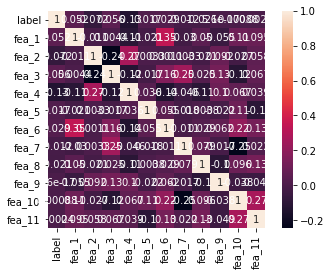

<Figure size 1440x1440 with 0 Axes>

In [11]:
corrMat = data.corr()
sns.heatmap(corrMat, annot=True, square=True)
fig = plt.figure(figsize= (20, 20))
plt.show()

In [12]:
class_0_counts, class_1_counts = data.label.value_counts()

In [13]:
class_0 = data[data['label'] == 0]
class_1 = data[data['label'] == 1]

Random Over Sampling: 
0    900
1    900
Name: label, dtype: int64


<AxesSubplot:title={'center':'Count(Label)'}>

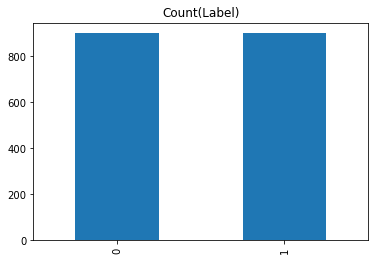

In [14]:
class_1_overSampled = class_1.sample(class_0_counts, replace=True)
data_over = pd.concat([class_0,class_1_overSampled], axis=0)

print("Random Over Sampling: ")
print(data_over.label.value_counts())

data_over.label.value_counts().plot(kind = 'bar', title = 'Count(Label)')

In [15]:
data_over.head()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1,0,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
4,0,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,6,1217.000000,3,56000.0,2,6,-1,100,3,60091,1.000000
8,0,5,1323.500000,3,218000.0,2,15,5,112,4,151300,282.842713


In [16]:
data_over.describe()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1800.000000,1800.000000,1800.000000,1800.000000,1.800000e+03,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.500000,5.567778,1282.996136,2.332778,1.135594e+05,1.931667,10.932778,4.801111,100.766667,4.174444,164889.264444,133.225000
std,0.500139,1.403508,47.213058,0.871916,8.397047e+04,0.252387,2.629087,2.907008,12.055873,0.873049,150855.820002,111.229170
min,0.000000,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,4.000000,1248.500000,1.000000,6.500000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60052.000000,1.000000
50%,0.500000,5.000000,1283.911373,3.000000,9.500000e+04,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,1.000000,7.000000,1308.500000,3.000000,1.330000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,330006.250000,200.000000
max,1.000000,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [17]:
data_over.shape

(1800, 12)

In [18]:
X = data_over.iloc[:, 1:]
y = data_over.iloc[:,0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 777)


In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1350, 11), (1350,), (450, 11), (450,))

In [21]:
y_train.head()

225    1
806    0
657    0
579    0
47     1
Name: label, dtype: int64

In [22]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [23]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_impurity_split': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [24]:
pipe.score(X_test, y_test)

0.9355555555555556

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def model_results(classifier, model_name):
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    print('Results for ',model_name, '\nTest Accuracy Score: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test , y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels= ['No Risk', 'At Risk'])
    display.plot()
    print(classification_report(y_test, y_pred, digits = 4))
    return accuracy_score(y_test, y_pred)

Results for  SVM 
Test Accuracy Score:  0.7022222222222222
              precision    recall  f1-score   support

           0     0.7292    0.6306    0.6763       222
           1     0.6822    0.7719    0.7243       228

    accuracy                         0.7022       450
   macro avg     0.7057    0.7013    0.7003       450
weighted avg     0.7054    0.7022    0.7006       450



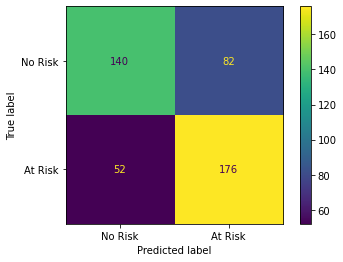

In [27]:
from sklearn.svm import SVC
SVM = SVC()
svm_acc = model_results(SVM , 'SVM')


Results for  Random-Forest 
Test Accuracy Score:  0.9422222222222222
              precision    recall  f1-score   support

           0     0.9667    0.9144    0.9398       222
           1     0.9208    0.9693    0.9444       228

    accuracy                         0.9422       450
   macro avg     0.9437    0.9419    0.9421       450
weighted avg     0.9434    0.9422    0.9422       450



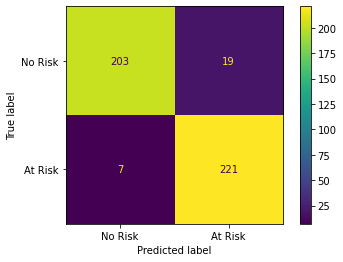

In [28]:
randomForest = RandomForestClassifier(criterion= "entropy", n_estimators= 500)
rf_result = model_results(randomForest, 'Random-Forest')

Results for  Logistic Regression 
Test Accuracy Score:  0.6111111111111112
              precision    recall  f1-score   support

           0     0.6146    0.5676    0.5902       222
           1     0.6082    0.6535    0.6300       228

    accuracy                         0.6111       450
   macro avg     0.6114    0.6105    0.6101       450
weighted avg     0.6114    0.6111    0.6104       450



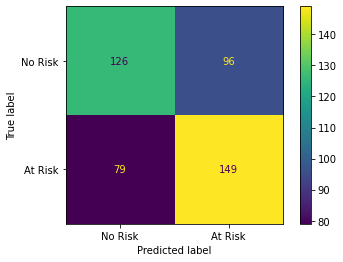

In [29]:
from sklearn.linear_model import LogisticRegression
logisticRegressor = LogisticRegression()
logistic_result = model_results(logisticRegressor, 'Logistic Regression')

Results for  SGD Classifier 
Test Accuracy Score:  0.5644444444444444
              precision    recall  f1-score   support

           0     0.5528    0.6126    0.5812       222
           1     0.5784    0.5175    0.5463       228

    accuracy                         0.5644       450
   macro avg     0.5656    0.5651    0.5637       450
weighted avg     0.5658    0.5644    0.5635       450



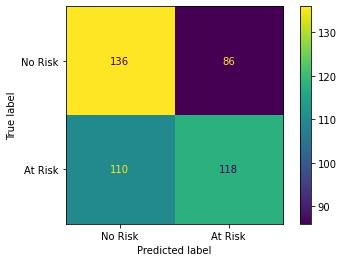

In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_result = model_results(sgd, 'SGD Classifier')

[18:51:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBOOST 
Test Accuracy Score:  0.9244444444444444
              precision    recall  f1-score   support

           0     0.9747    0.8694    0.9190       222
           1     0.8849    0.9781    0.9292       228

    accuracy                         0.9244       450
   macro avg     0.9298    0.9237    0.9241       450
weighted avg     0.9292    0.9244    0.9242       450



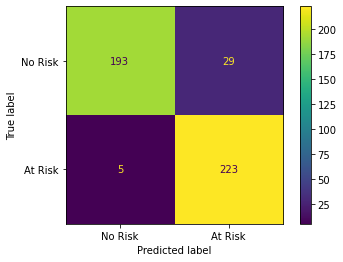

In [34]:
from xgboost import XGBClassifier
classifier = XGBClassifier(use_label_encoder= False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Results for XGBOOST', '\nTest Accuracy Score: ', accuracy_score(y_test, y_pred))
display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels= ['No Risk', 'At Risk'])
display.plot()
print(classification_report(y_test, y_pred, digits = 4))
xgb_result = accuracy_score(y_test, y_pred)

In [43]:
print("Model Accuracy Scores:\n1.Random Forest: ",rf_result, "\n2.XGBOOST: ",xgb_result, "\n3.SVM: ",svm_acc, "\n4.Logisitc Regression: ",logistic_result, "\n5.SGD: ",sgd_result)

Model Accuracy Scores:
1.Random Forest:  0.9422222222222222 
2.XGBOOST:  0.9244444444444444 
3.SVM:  0.7022222222222222 
4.Logisitc Regression:  0.6111111111111112 
5.SGD:  0.5644444444444444
